A local school district has a goal to reach a 95% graduation rate by the end of the decade by identifying students who need intervention before they drop out of school. As a software engineer contacted by the school district, your task is to model the factors that predict how likely a student is to pass their high school final exam, by constructing an intervention system that leverages supervised learning techniques. The board of supervisors has asked that you find the most effective model that uses the least amount of computation costs to save on the budget. You will need to analyze the dataset on students' performance and develop a model that will predict a given student will pass, quantifying whether an intervention is necessary.

In [2]:
#Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to the python environment.

In [4]:
data=pd.read_csv(r"C:\Users\User\Downloads\student-data.csv")

In [5]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [6]:
#Checking basic details of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
data.shape

(395, 31)

In [9]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [10]:
#Checking for null values

In [11]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

There is no null vales in the dataset

In [13]:
#Checking the number of zeroes and ones in dataset output columns

In [14]:
data['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [15]:
#Checking if this is a balanced dataset 
data['passed'].value_counts(normalize=True)

yes    0.670886
no     0.329114
Name: passed, dtype: float64

In [16]:
#Preprocessing

In [17]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [18]:
X= data.drop(['passed'],axis=1)
y =data['passed']
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
y=label_en.fit_transform(y)
label_encoders = {}
ordinal_features= ['school','sex','address','famsize','Pstatus',
                  'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']   

for i in ordinal_features:
    label_encoders[i] = LabelEncoder()
    X[i] = label_encoders[i].fit_transform(X[i]) 
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,at_home,teacher,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,at_home,other,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,at_home,other,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,health,services,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,other,other,...,1,0,0,4,3,2,1,2,5,4


In [19]:
#Applying One hot encoding to convert categorical columns into numerical value.

In [20]:
X=pd.get_dummies(X)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [21]:
arr = {'Accuracy':[],'Precision':[],'Recall':[],'F1_Score':[],'Failure%':[],'Time_Taken':[]}

# Split dataset into train and test sets

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [24]:
X_train.shape

(316, 43)

In [25]:
#Finding the most effective model that uses the least amount of computation costs to save on the budget

# 1.Logistic Regression

In [26]:
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

start_time = time.time()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
logit_reg=LogisticRegression()
model=logit_reg.fit(X_train,y_train)
predictions=model.predict(X_test)

end_time = time.time()

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

arr['Accuracy'].append(accuracy1)
arr['Precision'].append(precision1)
arr['Recall'].append(recall1)
arr['F1_Score'].append(f11)
arr['Failure%'].append(fail_percent)
arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for Logistic Regression = ',time_taken, ' seconds')

Accuracy is 0.7088607594936709
precision is 0.7301587301587301
recall is 0.8846153846153846
f1_score is 0.7999999999999999
[[10 17]
 [ 6 46]]
% of students failing after intervention =  7.59493670886076
Time taken for Logistic Regression =  0.3676912784576416  seconds


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
#For a good model accuracy and f1_score should be maximum possible.

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

#To find the optimum K value. For this we have to create model with varied k values 

acc_values = [] 
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    
    #append the accuracy value to list 
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values)  

[0.6582278481012658, 0.6455696202531646, 0.6708860759493671, 0.6329113924050633, 0.6455696202531646, 0.6582278481012658, 0.6708860759493671, 0.6835443037974683, 0.6455696202531646, 0.6708860759493671, 0.6962025316455697, 0.6962025316455697]


Text(0, 0.5, 'Accuracy')

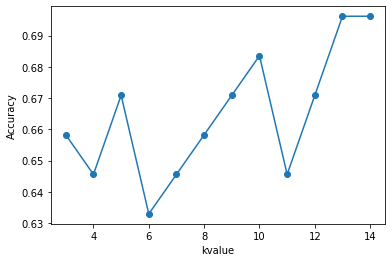

In [29]:
#Lets find for which value we got the max accuracy 
plt.plot(neighbors,acc_values, 'o-') #'o-' is shape
plt.xlabel('kvalue')
plt.ylabel('Accuracy')

In [32]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
end_time = time.time()

In [33]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

arr['Accuracy'].append(accuracy1)
arr['Precision'].append(precision1)
arr['Recall'].append(recall1)
arr['F1_Score'].append(f11)
arr['Failure%'].append(fail_percent)
arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for KNN = ',time_taken, ' seconds')

Accuracy is 0.6962025316455697
precision is 0.6944444444444444
recall is 0.9615384615384616
f1_score is 0.8064516129032258
[[ 5 22]
 [ 2 50]]
% of students failing after intervention =  2.5316455696202533
Time taken for KNN =  267.6491930484772  seconds


# 3. Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictions=dt_model.predict(X_test)
end_time = time.time()

In [38]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

arr['Accuracy'].append(accuracy1)
arr['Precision'].append(precision1)
arr['Recall'].append(recall1)
arr['F1_Score'].append(f11)
arr['Failure%'].append(fail_percent)
arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for Decision Tree = ',time_taken, ' seconds')

Accuracy is 0.6329113924050633
precision is 0.7017543859649122
recall is 0.7692307692307693
f1_score is 0.7339449541284404
[[10 17]
 [12 40]]
% of students failing after intervention =  15.18987341772152
Time taken for Decision Tree =  0.03991532325744629  seconds


# SVM

In [39]:
from sklearn.svm import SVC
start_time = time.time()
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
predictions=svm_linear.predict(X_test)
end_time = time.time()

In [40]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

arr['Accuracy'].append(accuracy1)
arr['Precision'].append(precision1)
arr['Recall'].append(recall1)
arr['F1_Score'].append(f11)
arr['Failure%'].append(fail_percent)
arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for SVM = ',time_taken, ' seconds')

Accuracy is 0.6962025316455697
precision is 0.7258064516129032
recall is 0.8653846153846154
f1_score is 0.7894736842105263
[[10 17]
 [ 7 45]]
% of students failing after intervention =  8.860759493670885
Time taken for SVM =  0.3357231616973877  seconds


# 5. Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
end_time = time.time()

In [44]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions)
recall1 = recall_score(y_test,predictions)
f11 = f1_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time

arr['Accuracy'].append(accuracy1)
arr['Precision'].append(precision1)
arr['Recall'].append(recall1)
arr['F1_Score'].append(f11)
arr['Failure%'].append(fail_percent)
arr['Time_Taken'].append(time_taken)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)
print('% of students failing after intervention = ',fail_percent)
print('Time taken for Random Forest = ',time_taken, ' seconds')

Accuracy is 0.6962025316455697
precision is 0.7058823529411765
recall is 0.9230769230769231
f1_score is 0.8000000000000002
[[ 7 20]
 [ 4 48]]
% of students failing after intervention =  5.063291139240507
Time taken for Random Forest =  1.9183545112609863  seconds


# Conclusion

We can choose Logistic Regression as the most effective model that uses the least amount of computation costs to save on the budget.